In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/bil-b/Downloads/Enhanced Pizza Sales Data (2024–2025)/pizza_sales_data_2024_2025.csv")

# test = pd.read_csv("C:/Users/bil-b/Downloads/Enhanced Pizza Sales Data (2024–2025)/pizza_sales_data_2024_2025.csv", parse_dates=["Order Time", "Delivery Time"])

### Looking at the data

In [3]:
df.shape

(1004, 25)

In [4]:
df.head(5)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      1004 non-null   object 
 1   Restaurant Name               1004 non-null   object 
 2   Location                      1004 non-null   object 
 3   Order Time                    1004 non-null   object 
 4   Delivery Time                 1004 non-null   object 
 5   Delivery Duration (min)       1004 non-null   int64  
 6   Pizza Size                    1004 non-null   object 
 7   Pizza Type                    1004 non-null   object 
 8   Toppings Count                1004 non-null   int64  
 9   Distance (km)                 1004 non-null   float64
 10  Traffic Level                 1004 non-null   object 
 11  Payment Method                1004 non-null   object 
 12  Is Peak Hour                  1004 non-null   bool   
 13  Is 

# Data Cleaning

### Check Missing data

In [6]:
df.isna().sum()

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
dtype: int64

### Check Duplicate

In [7]:
df.duplicated().sum()

0

### Check Type Columns

In [8]:
df.dtypes

Order ID                         object
Restaurant Name                  object
Location                         object
Order Time                       object
Delivery Time                    object
Delivery Duration (min)           int64
Pizza Size                       object
Pizza Type                       object
Toppings Count                    int64
Distance (km)                   float64
Traffic Level                    object
Payment Method                   object
Is Peak Hour                       bool
Is Weekend                         bool
Delivery Efficiency (min/km)    float64
Topping Density                 float64
Order Month                      object
Payment Category                 object
Estimated Duration (min)        float64
Delay (min)                     float64
Is Delayed                         bool
Pizza Complexity                  int64
Traffic Impact                    int64
Order Hour                        int64
Restaurant Avg Time             float64


In [9]:
# Changing data type of columns

df["Order Time"] = pd.to_datetime(df["Order Time"])
df["Delivery Time"] = pd.to_datetime(df["Delivery Time"])

### Checking for Outliers

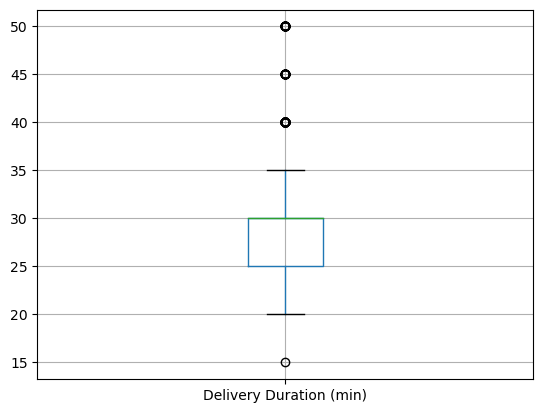

In [10]:
df.boxplot(column=["Delivery Duration (min)"])
plt.show()

In [11]:
df["mean_by_restaurant_name"] = df.groupby("Restaurant Name")["Delivery Duration (min)"].transform(lambda x: x.mean())

print(df[["Restaurant Name","mean_by_restaurant_name"]].head())

  Restaurant Name  mean_by_restaurant_name
0        Domino's                30.259434
1     Papa John's                28.186275
2  Little Caesars                28.844221
3       Pizza Hut                29.948454
4   Marco's Pizza                30.286458


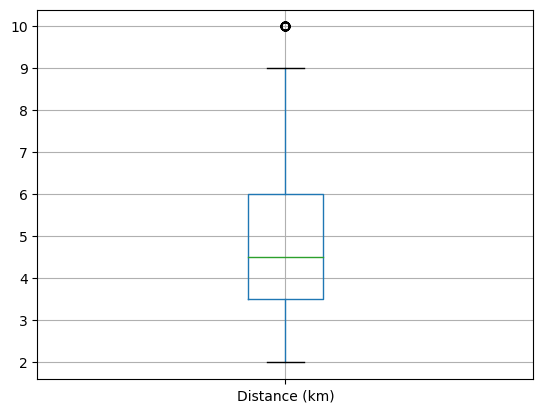

In [12]:
df.boxplot(column=["Distance (km)"])
plt.show()

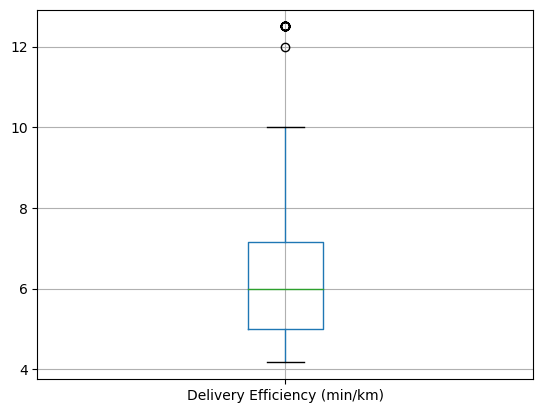

In [13]:
df.boxplot(column=["Delivery Efficiency (min/km)"])
plt.show()

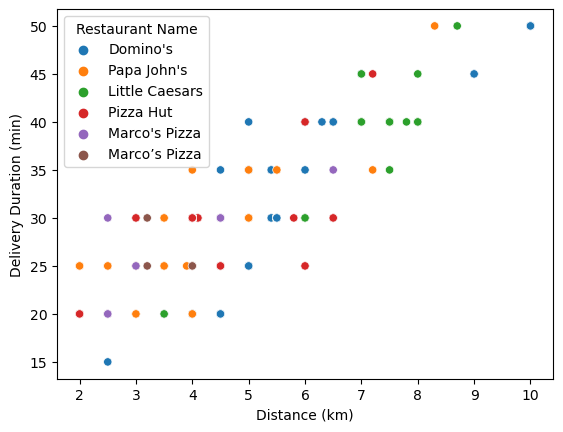

In [14]:
sns.scatterplot(data=df, x="Distance (km)", y="Delivery Duration (min)", hue="Restaurant Name")
plt.show()

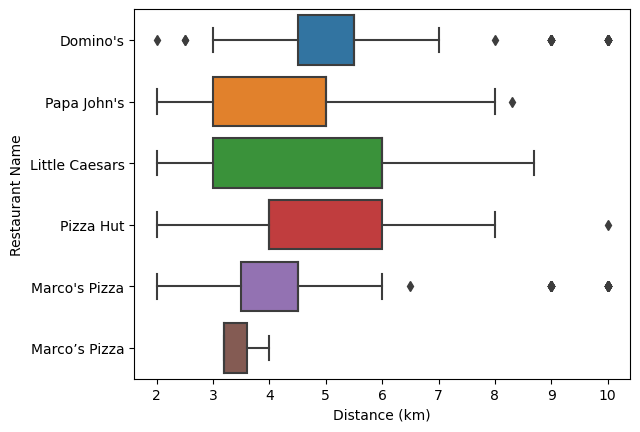

In [15]:
sns.boxplot(df, x="Distance (km)", y="Restaurant Name")
plt.show()

In [16]:
df.value_counts("Pizza Size")

Pizza Size
Medium    429
Large     240
XL        203
Small     132
Name: count, dtype: int64

In [17]:
df.value_counts("Pizza Type")

Pizza Type
Non-Veg          216
Veg              202
Cheese Burst     188
Vegan            132
Sicilian          64
BBQ Chicken       54
Margarita         54
Gluten-Free       41
Thai Chicken      24
Stuffed Crust     21
Deep Dish          6
Thin Crust         2
Name: count, dtype: int64

In [18]:
df["Restaurant Name"].value_counts()

Restaurant Name
Domino's          212
Papa John's       204
Little Caesars    199
Pizza Hut         194
Marco's Pizza     192
Marco’s Pizza       3
Name: count, dtype: int64

In [19]:
df["Restaurant Name"] = df["Restaurant Name"].str.replace("Marco’s Pizza", "Marco's Pizza")

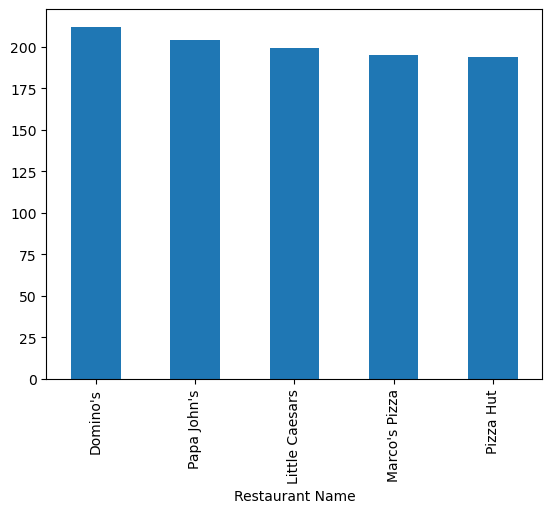

In [20]:
df["Restaurant Name"].value_counts().plot(kind="bar")
plt.show()

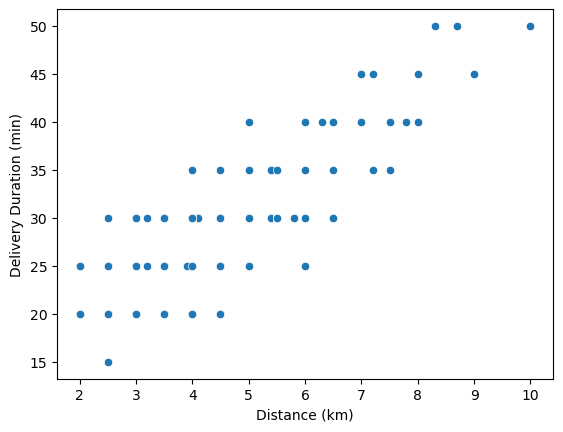

In [21]:
sns.scatterplot(data=df, x="Distance (km)", y="Delivery Duration (min)")
plt.show()

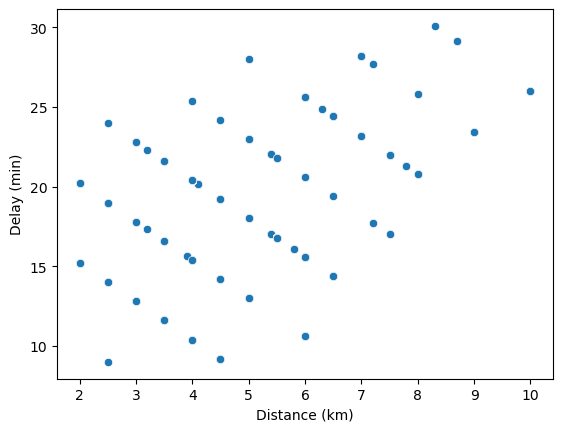

In [22]:
sns.scatterplot(data=df, x="Distance (km)", y="Delay (min)")
plt.show()

In [23]:
df.describe()

,Order Time,Delivery Time,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,mean_by_restaurant_name
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2025-03-27 00:33:24.980079872,2025-03-27 01:02:54.501992192,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032,29.492032
min,2024-01-05 18:30:00,2024-01-05 18:45:00,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667,26.666667
25%,2024-08-31 13:33:45,2024-08-31 14:05:00,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221,28.844221
50%,2025-03-01 07:30:00,2025-03-01 08:12:30,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454,29.948454
75%,2025-11-07 00:48:45,2025-11-07 01:18:45,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434,30.259434
max,2026-07-07 20:00:00,2026-07-07 20:30:00,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458,30.286458
std,NaN,NaN,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941,0.859941


In [24]:
df.corr(numeric_only=True)

,Delivery Duration (min),Toppings Count,Distance (km),Is Peak Hour,Is Weekend,Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,mean_by_restaurant_name
Delivery Duration (min),1.000000,0.486244,0.913345,0.232749,-0.004192,-0.409430,-0.526196,0.913345,0.876687,0.807972,0.452159,0.578638,0.403788,0.110916,0.110916
Toppings Count,0.486244,1.000000,0.686119,0.053746,-0.049934,-0.710734,0.281113,0.686119,0.140368,0.368575,0.960540,0.677672,0.136239,0.088425,0.088425
Distance (km),0.913345,0.686119,1.000000,0.172367,-0.023925,-0.704178,-0.434584,1.000000,0.604837,0.744068,0.657865,0.654897,0.297611,0.151198,0.151198
Is Peak Hour,0.232749,0.053746,0.172367,1.000000,-0.012924,0.012189,-0.225167,0.172367,0.251558,0.113046,0.115737,0.021109,0.838989,-0.184571,-0.184571
Is Weekend,-0.004192,-0.049934,-0.023925,-0.012924,1.000000,0.055806,-0.027392,-0.023925,0.020067,0.011824,-0.035731,-0.000692,0.003330,0.031432,0.031432
Delivery Efficiency (min/km),-0.409430,-0.710734,-0.704178,0.012189,0.055806,1.000000,0.186705,-0.704178,0.031197,-0.301930,-0.680977,-0.434185,-0.014272,-0.213141,-0.213141
Topping Density,-0.526196,0.281113,-0.434584,-0.225167,-0.027392,0.186705,1.000000,-0.434584,-0.515672,-0.417775,0.224191,0.023206,-0.271899,-0.074904,-0.074904
Estimated Duration (min),0.913345,0.686119,1.000000,0.172367,-0.023925,-0.704178,-0.434584,1.000000,0.604837,0.744068,0.657865,0.654897,0.297611,0.151198,0.151198
Delay (min),0.876687,0.140368,0.604837,0.251558,0.020067,0.031197,-0.515672,0.604837,1.000000,0.701119,0.107086,0.357951,0.438099,0.038293,0.038293
Is Delayed,0.807972,0.368575,0.744068,0.113046,0.011824,-0.301930,-0.417775,0.744068,0.701119,1.000000,0.368168,0.484989,0.260867,0.090578,0.090578


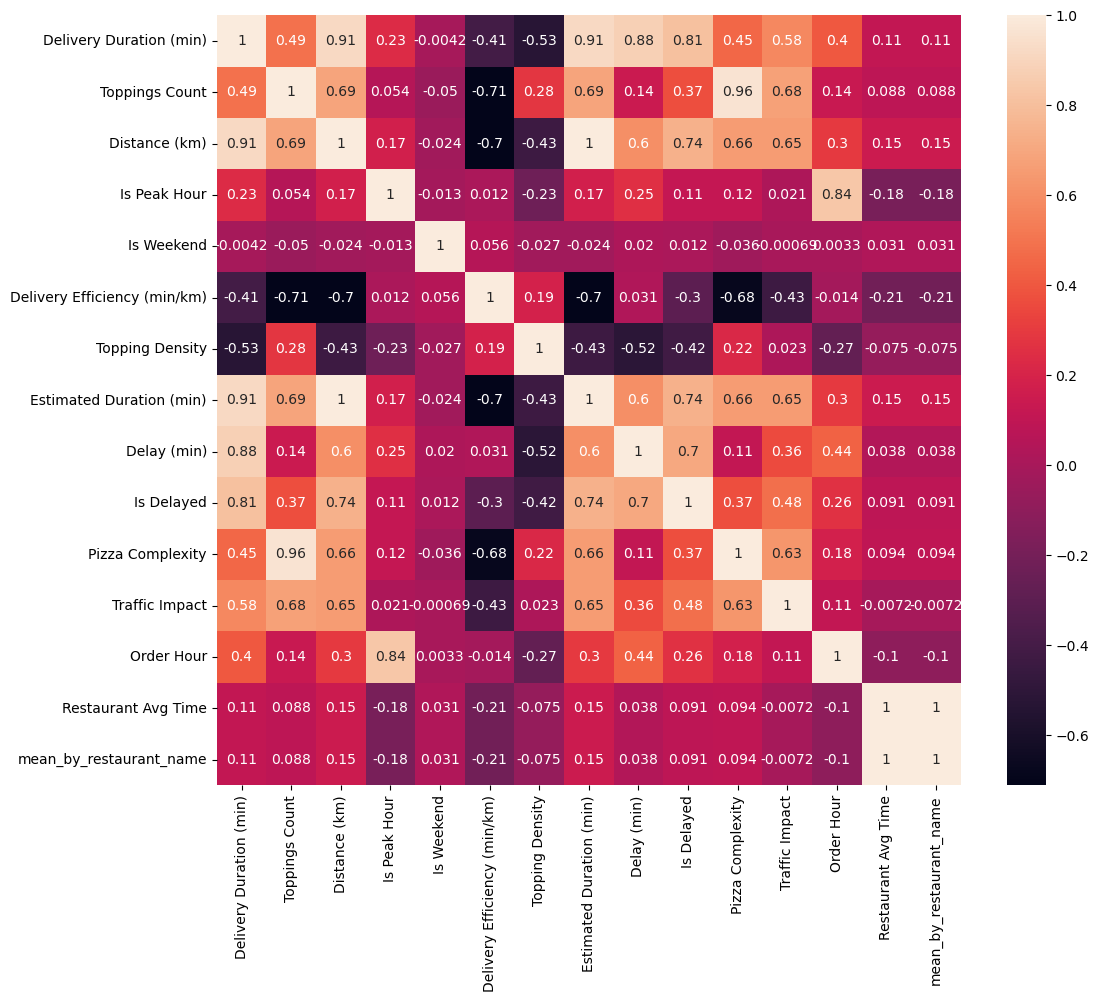

In [25]:
plt.figure(figsize=(12, 10)) # กว้าง, สูง
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

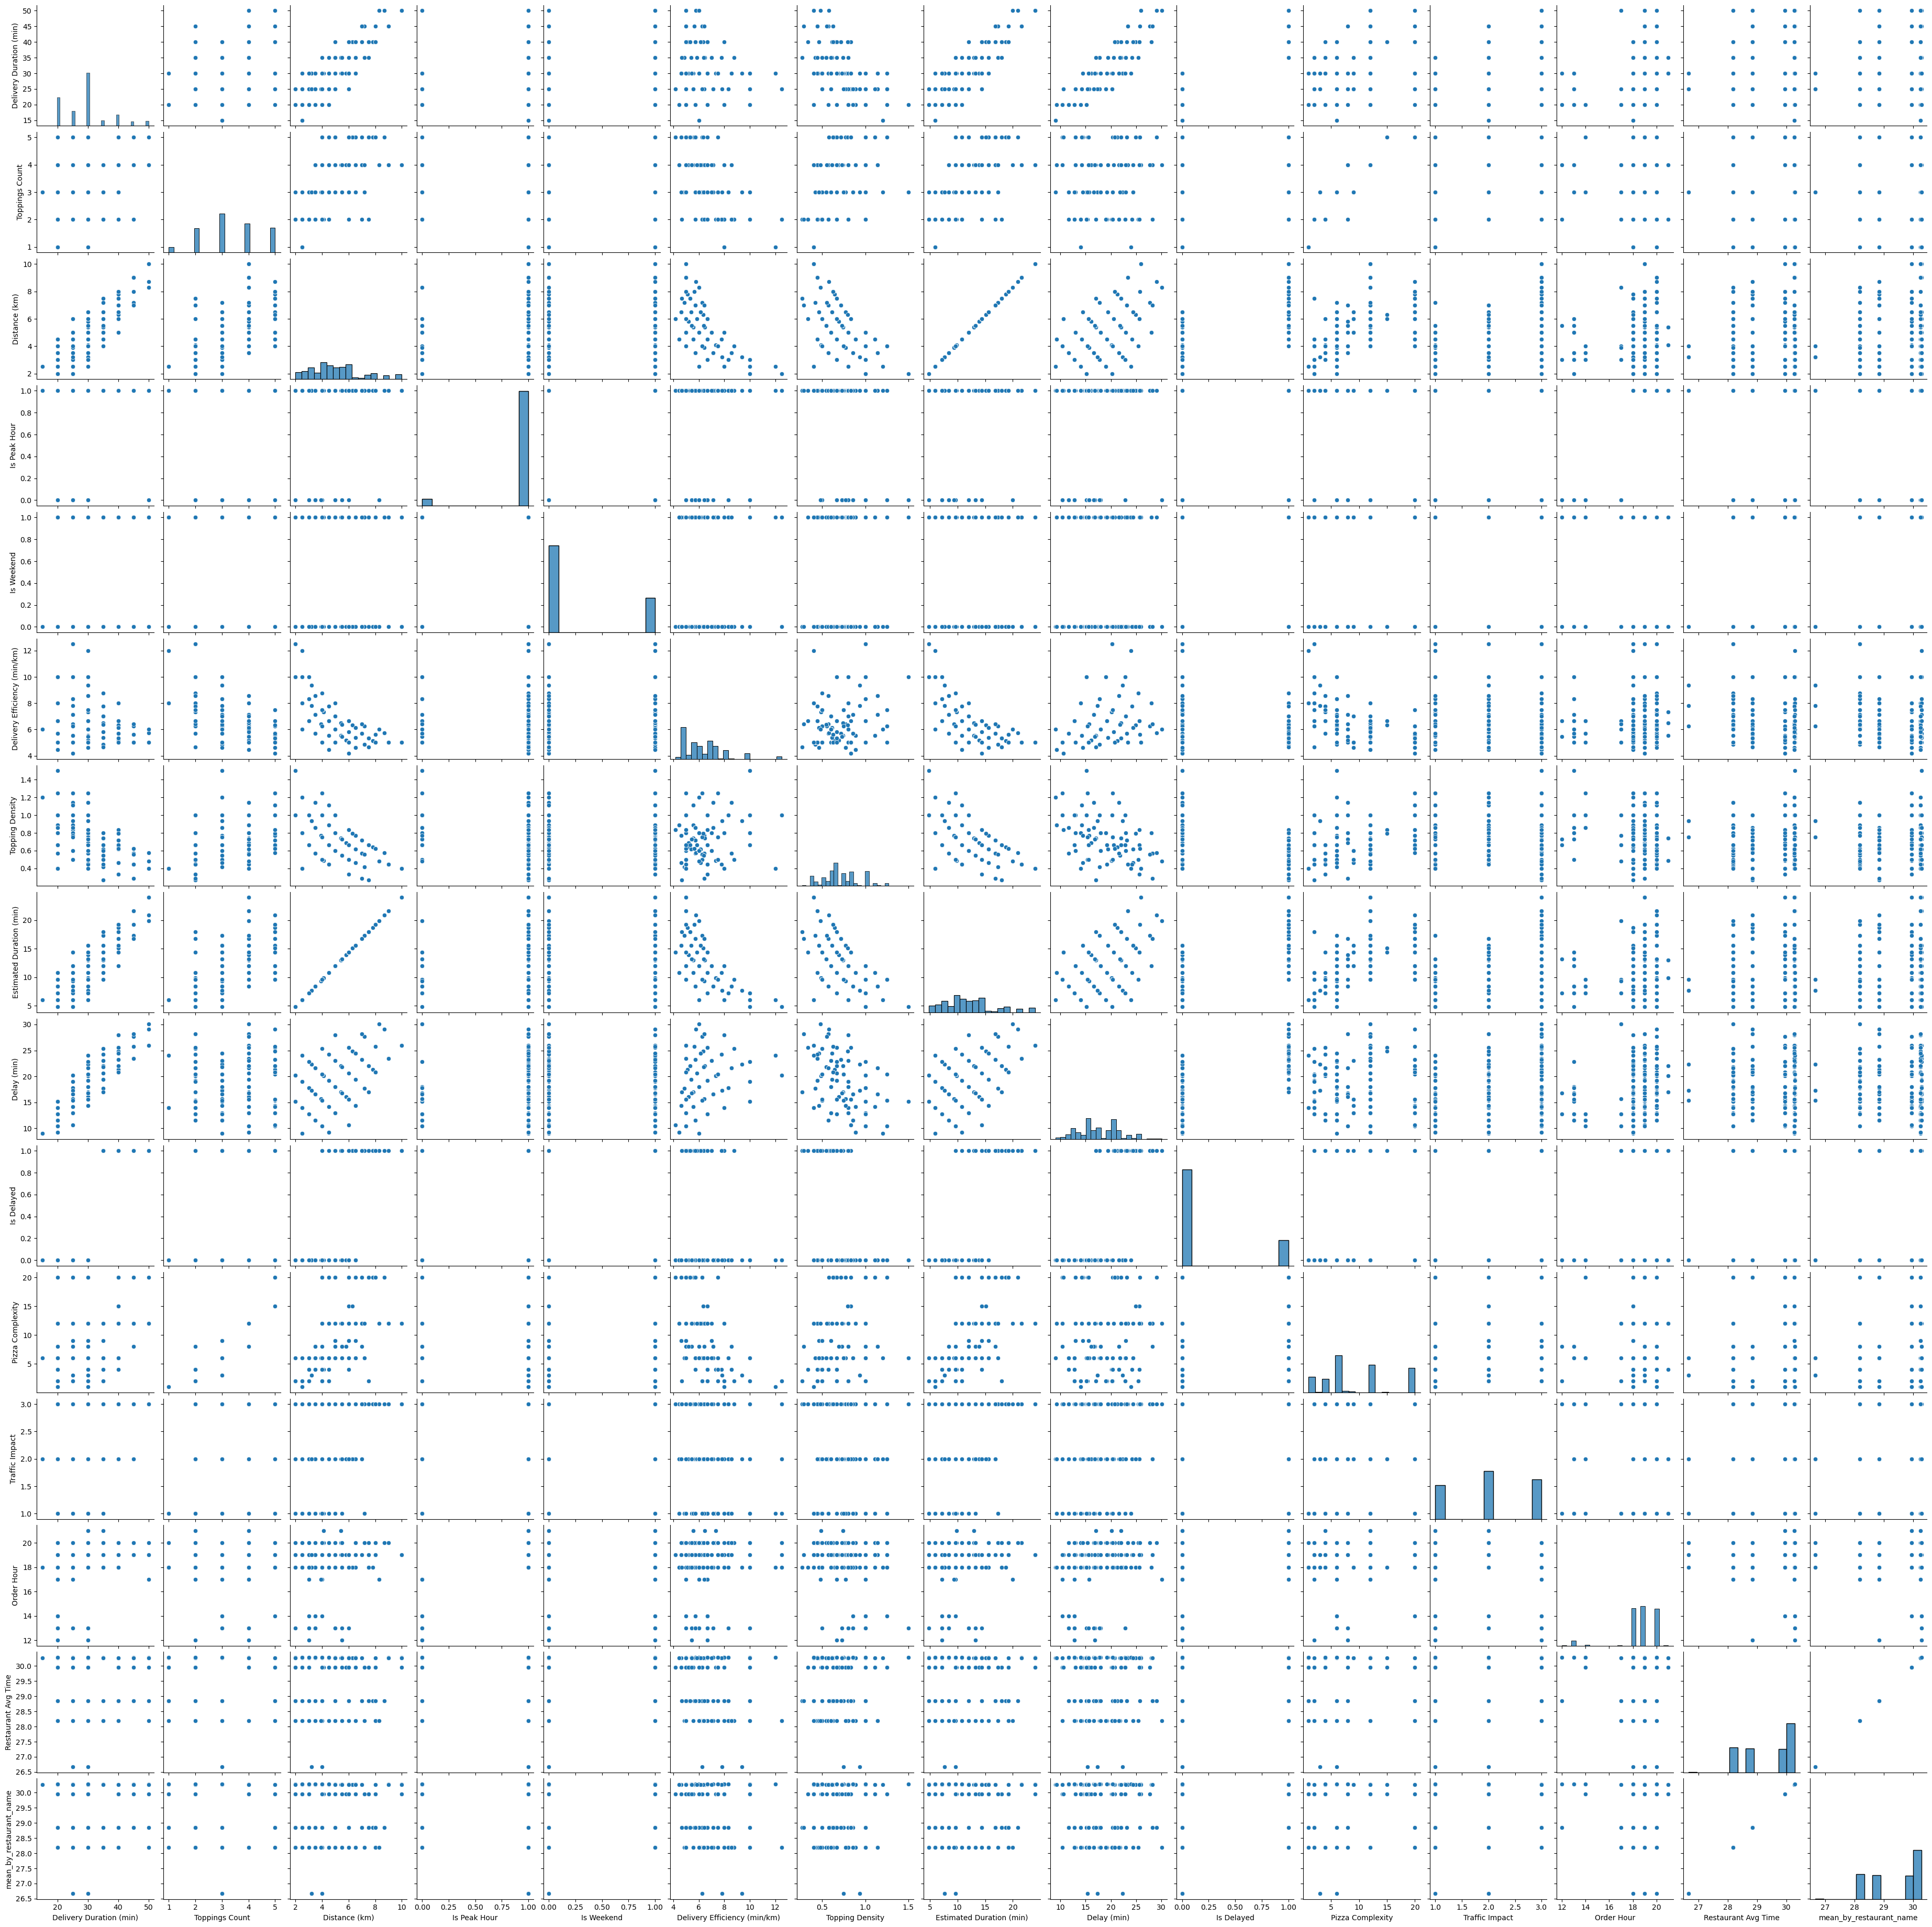

In [26]:
sns.pairplot(data=df)
plt.show()

C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bil-b\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


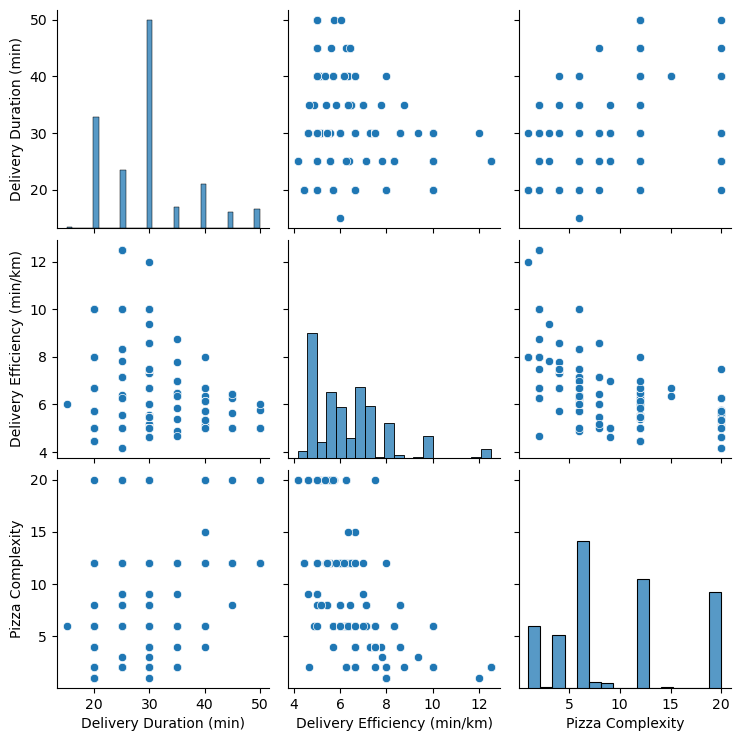

In [27]:
sns.pairplot(data=df, vars=["Delivery Duration (min)", "Delivery Efficiency (min/km)", "Pizza Complexity"])
plt.show()

In [28]:
pd.crosstab(df["Restaurant Name"], df["Pizza Size"])

Pizza Size,Large,Medium,Small,XL
Restaurant Name,,,,
Domino's,160,47,2,3
Little Caesars,0,46,43,110
Marco's Pizza,36,142,17,0
Papa John's,26,129,47,2
Pizza Hut,18,65,23,88


In [29]:
pd.crosstab(df["Restaurant Name"], df["Toppings Count"])

Toppings Count,1,2,3,4,5
Restaurant Name,,,,,
Domino's,1,29,28,150,4
Little Caesars,21,23,46,0,109
Marco's Pizza,15,3,137,40,0
Papa John's,1,61,108,32,2
Pizza Hut,5,82,0,18,89


---

# Data Exploration!

## The pizza shop with the most orders

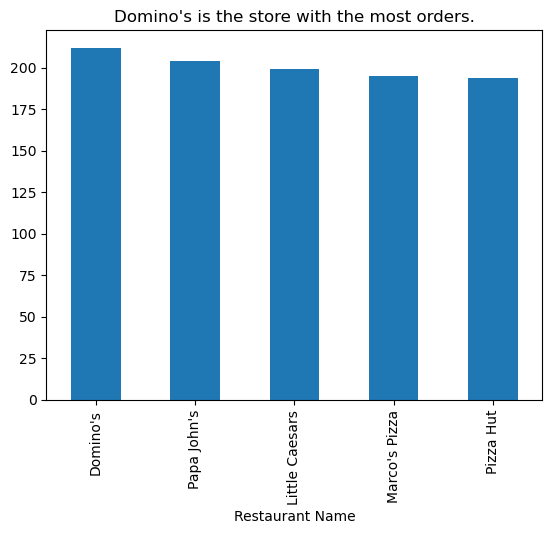

In [30]:
# Check which store has the highest number of orders

df["Restaurant Name"].value_counts().plot(kind="bar")

plt.title("Domino's is the store with the most orders.")
plt.show()

In [31]:
df_count = df[["Restaurant Name", "Pizza Size"]].value_counts().reset_index(name="Count Orders").sort_values("Restaurant Name")

df_count

,Restaurant Name,Pizza Size,Count Orders
0,Domino's,Large,160
15,Domino's,XL,3
16,Domino's,Small,2
6,Domino's,Medium,47
9,Little Caesars,Small,43
8,Little Caesars,Medium,46
3,Little Caesars,XL,110
10,Marco's Pizza,Large,36
14,Marco's Pizza,Small,17
1,Marco's Pizza,Medium,142


In [32]:
df["Pizza Size"].value_counts()

Pizza Size
Medium    429
Large     240
XL        203
Small     132
Name: count, dtype: int64

C:\Users\bil-b\AppData\Local\Temp\ipykernel_19296\1611682711.py:3: FutureWarning: The provided callable <function mean at 0x0000025EF9AB2700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby(["Restaurant Name", "Pizza Size"])["Topping Density"].agg(np.mean))


Restaurant Name  Pizza Size
Domino's         Large         0.700113
                 Medium        0.650812
                 Small         0.700000
                 XL            0.949074
Little Caesars   Medium        0.856211
                 Small         0.590698
                 XL            0.755911
Marco's Pizza    Large         0.423267
                 Medium        0.766397
                 Small         0.463235
Papa John's      Large         0.673237
                 Medium        0.661096
                 Small         0.901891
                 XL            0.625000
Pizza Hut        Large         0.665713
                 Medium        0.499791
                 Small         0.840580
                 XL            0.915744
Name: Topping Density, dtype: float64


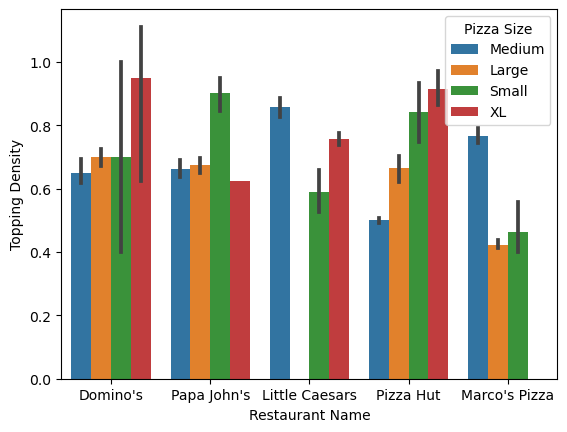

In [33]:
# Find out why there are so many orders. Is it because each pizza size has a high density of toppings?

print(df.groupby(["Restaurant Name", "Pizza Size"])["Topping Density"].agg(np.mean))

sns.barplot(df, x="Restaurant Name", y="Topping Density", hue="Pizza Size")

plt.show()

In [34]:
# Check the average delivery distance of each store.

res_distance = df.groupby("Restaurant Name")["Distance (km)"].agg(np.mean)

res_distance.sort_values(ascending=False)

C:\Users\bil-b\AppData\Local\Temp\ipykernel_19296\435245067.py:3: FutureWarning: The provided callable <function mean at 0x0000025EF9AB2700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  res_distance = df.groupby("Restaurant Name")["Distance (km)"].agg(np.mean)


Restaurant Name
Domino's          5.515566
Little Caesars    5.092965
Marco's Pizza     4.914872
Pizza Hut         4.890722
Papa John's       4.291176
Name: Distance (km), dtype: float64

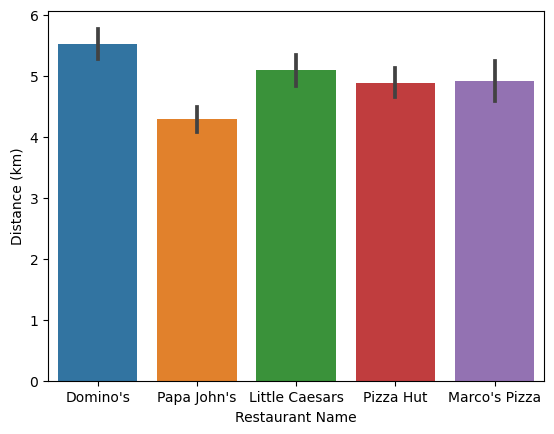

In [35]:
sns.barplot(df, x="Restaurant Name", y="Distance (km)")

plt.show()

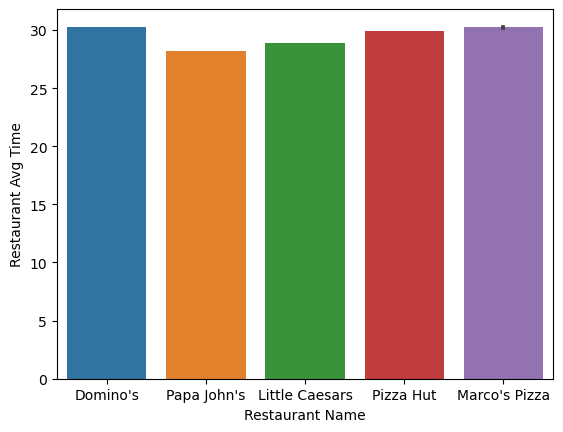

In [36]:
# Processing time for each order

sns.barplot(df, x="Restaurant Name", y="Restaurant Avg Time")

plt.show()

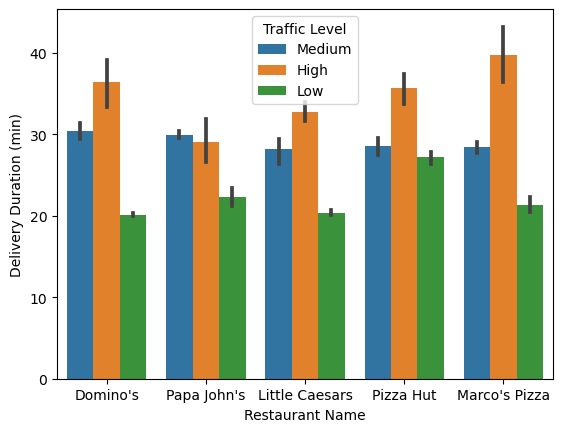

In [37]:
sns.barplot(df, x="Restaurant Name", y="Delivery Duration (min)", hue="Traffic Level")

plt.show()

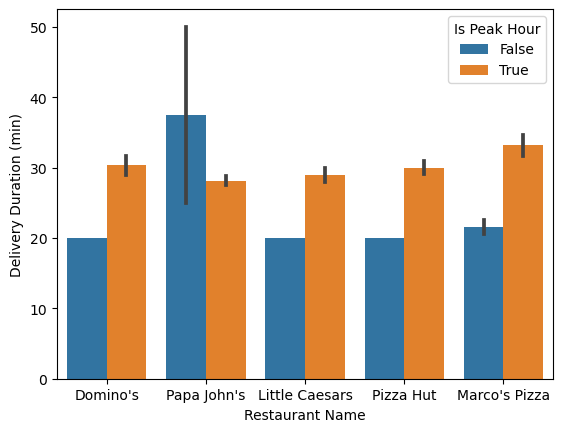

In [38]:
# Average delivery time during peak hours for each store

sns.barplot(df, x="Restaurant Name", y="Delivery Duration (min)", hue="Is Peak Hour")

plt.show()

##### Domino's has the highest number of orders. The reason is thought to be because of the density of toppings. The average number of pizzas of different sizes is higher than almost every other store. Another reason is that Domino's has a higher average delivery distance than other stores but uses an average delivery time similar to other stores. This may be the reason why most customers decide to order from Domino's.

---

## When is it a good time to run promotions or increase staff numbers?

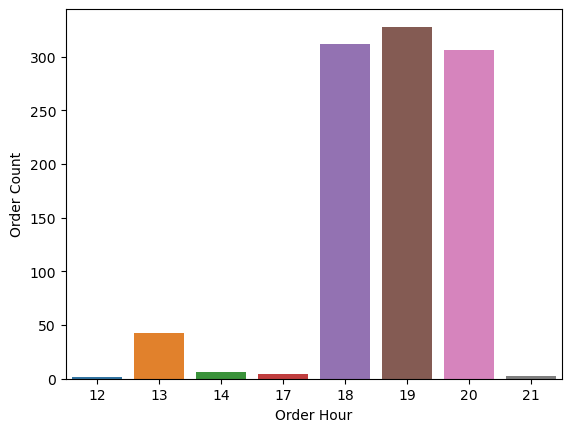

In [39]:
best_sell_hour = df.groupby("Order Hour").size().reset_index(name="Order Count")

sns.barplot(best_sell_hour, x="Order Hour", y="Order Count")
plt.show()

##### The time period when more staff should be added is between 6:00 PM and 8:00 PM.

---

## Which type of pizza has the most orders between 6pm-8pm?

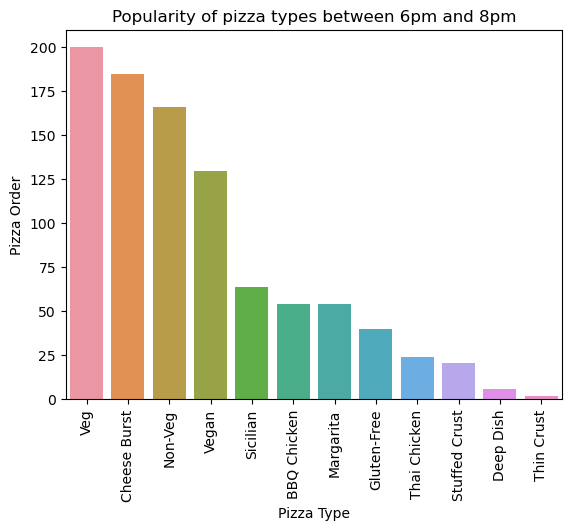

In [40]:
# Most ordered pizza type between 6pm-8pm

df_pop_pizza = df[df["Order Hour"].isin([18, 19, 20])]

pop_pizza_type = df_pop_pizza["Pizza Type"].value_counts().reset_index(name="Pop Order Pizza")

sns.barplot(pop_pizza_type, x="Pizza Type", y="Pop Order Pizza")
plt.title("Popularity of pizza types between 6pm and 8pm")
plt.ylabel("Pizza Order")
plt.xticks(rotation=90)
plt.show()

##### The most ordered pizza types are Veg, Cheese Burst, Non-veg respectively. If you want to promote the popular pizza types during 6pm-8pm, you should introduce these 3 pizza types.

---